# My ego network in VK

In [2]:
import vk_requests 
import time
import matplotlib.pyplot as plt
import networkx as nx

## Data preparation

To get a list of my friends and information about them I'll need a service token

In [455]:
SERVICE='' 
api = vk_requests.create_api(service_token=SERVICE) 

In [456]:
my_friends = {}
for i in api.friends.get(user_id = 41936502)['items']:
    try:
        my_friends[i] = api.users.get(user_ids=i, fields='screen_name')
        my_friends[i] = {'name': my_friends[i][0]['first_name'] + ' ' + my_friends[i][0]['last_name']}
    except:
        print(i)
sorted(my_friends.items())[:10]

[(188006, {'name': 'Liza Zotova'}),
 (350192, {'name': 'Sergey Szhyonov'}),
 (1008411, {'name': 'Alina Kulyasova'}),
 (1382787, {'name': 'Alexey Paevsky'}),
 (1626047, {'name': 'Yana Tikhomirova'}),
 (2970182, {'name': 'Antonina Selezneva'}),
 (3976159, {'name': 'Marie Mignonne'}),
 (5138249, {'name': 'Anastasia Mishina'}),
 (6574872, {'name': 'Dmitry Panichev'}),
 (6639052, {'name': 'Maria Gudzenko'})]

To get lists of their friends an access toker is required

In [457]:
ACCESS=''
api = vk_requests.create_api(service_token=ACCESS)

In [458]:
list_of_errors=[]
for i in my_friends:
    try:
        time.sleep(0.6)
        my_friends[i]['friends']=api.friends.getMutual(source_uid=i, target_uid=41936502)
    except:
        list_of_errors.append(i)
sorted(my_friends.items())[:3], list_of_errors

([(188006, {'name': 'Liza Zotova', 'friends': [350192, 26944386]}),
  (350192, {'name': 'Sergey Szhyonov', 'friends': [188006, 26944386]}),
  (1008411, {'name': 'Alina Kulyasova', 'friends': [5138249, 8798948]})],
 [26994913,
  28170927,
  47725993,
  76952023,
  81788017,
  124492587,
  148583738,
  162531371,
  182427889,
  200038087])

Let's get rid of 'DELETED' accouts (they are all deleted, I have checked it out)

In [451]:
print(len(my_friends))
for i in list_of_errors:
    my_friends.pop(i)
print(len(my_friends))

94
84


## Creating a graph

Now we can create a Graph object and calculate some simple metrics 

In [372]:
g = nx.Graph(directed=False)
    
for i in my_friends:
    g.add_node(i)
    for j in my_friends[i]['friends']:
        if i in my_friends and j in my_friends:
            g.add_edge(i, j)
            
print(f'''Number of nodes: {g.number_of_nodes()}
Number of edges: {g.number_of_edges()}
Is connected: {nx.is_connected(g)}
Clustering coefficient: {nx.average_clustering(g):.2f}''')

Number of nodes: 84
Number of edges: 345
Is connected: False
Clustering coefficient: 0.57


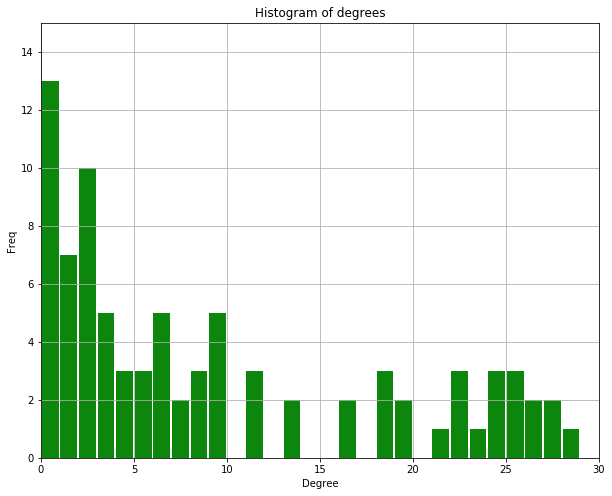

In [302]:
x=[len(my_friends[i]['friends']) for i in my_friends]
plt.figure(1, figsize=(10,8))
n, bins, patches = plt.hist(x, facecolor='g', alpha=0.95, rwidth=0.9, bins=max(x))
plt.xlabel('Degree')
plt.ylabel('Freq')
plt.title('Histogram of degrees')
plt.axis([0, 30, 0, 15])
plt.grid(True)
plt.show()

Okey, let's look at the graph (excluding those people who don't have mutual friends with me)

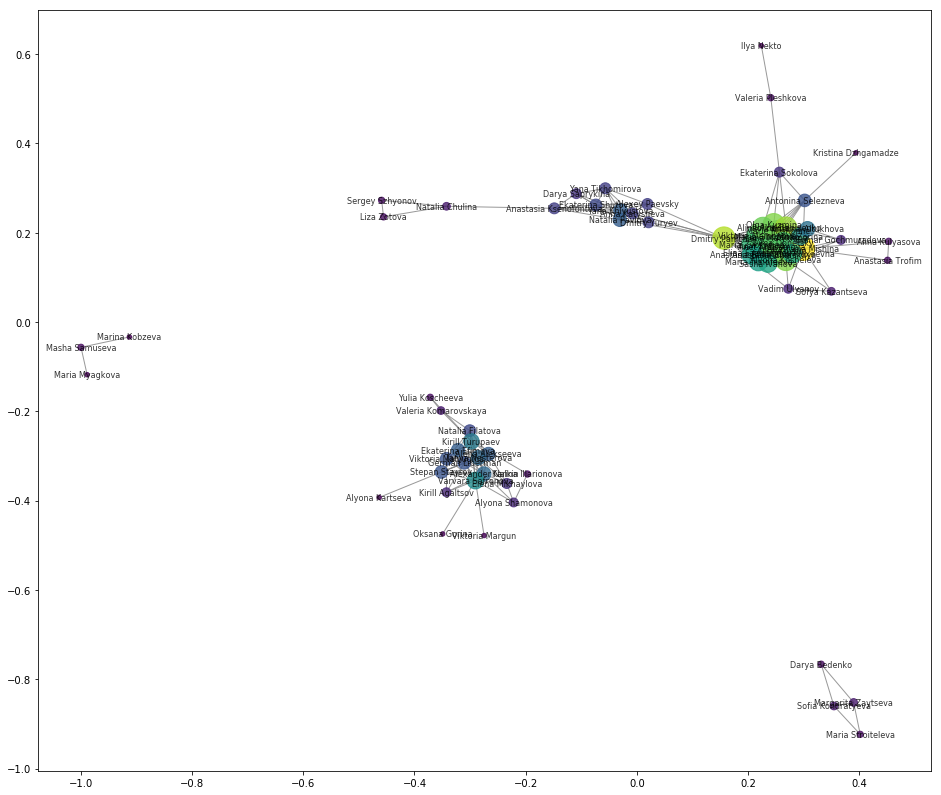

In [417]:
g=nx.k_core(g, k=1)
deg = dict(nx.degree(g))

plt.figure(1, figsize=(16,14))
# coord = nx.kamada_kawai_layout(g)
coord = nx.spring_layout(g)
nx.draw_networkx(g,
                 pos=coord,
                 nodelist=list(deg.keys()),
                 node_size = [d*20 for d in deg.values()],
                 node_color=list(deg.values()),
                 edge_color='gray',
                 font_size=8,
#                  cmap=plt.cm.Reds,
                 with_labels=True,
                 alpha=0.8,
                 labels={k:v['name'] for k,v in my_friends.items() if k in deg},
                 )

OMG, I can hardly see anything (and changing layouts doesn't help me)

It's worth looking at the connected components

## Examining subgraphs

In [138]:
con_comps = sorted(nx.connected_components(g), key = len, reverse=True)
for comp in con_comps:
    print([my_friends[i]['name'] for i in comp], '\n')

['Natalia Chulina', 'Alexey Paevsky', 'Mira Zorina', 'Ekaterina Shutova', 'Anet Khuseinova', 'Gulnar Gochmuradova', 'Alyona Kosheleva', 'Yana Khlyustova', 'Sasha Ivanova', 'Lena Malykhina', 'Dmitry Panichev', 'Kristina Dzhgamadze', 'Alina Kulyasova', 'Ilya Nekto', 'Ekaterina Sokolova', 'Anastasia Ksenofontova', 'Elina Fazletdinova', 'Olga Kuzmina', 'Dmitry Yuryev', 'Maria Zvorygina', 'Yana Tikhomirova', 'Kristina Altukhova', 'Antonina Selezneva', 'Anastasia Mishina', 'Maria Gudzenko', 'Polina Denisenko', 'Alisa Kovtun', 'Yusif Safarov', 'Marie Mignonne', 'Anastasia Balandina', 'Natalia Pavlova', 'Anastasia Trofim', 'Liza Zotova', 'Vadim Ulyanov', 'Alina Akulina', 'Maria Timofeeva', 'Dima Donetsky', 'Viktoria Mamonova', 'Sergey Szhyonov', 'Darya Saprykina', 'Anastasia Alexeevna', 'Sofya Kazantseva', 'Anna Katysheva', 'Valeria Pleshkova', 'Anastasia Zharskaya'] 

['Karina Illarionova', 'Alyona Kartseva', 'Oksana Gorina', 'Kirill Turupaev', 'Valeria Komarovskaya', 'Ekaterina Efimova', 'El

Wow, it's easy: the first one includes friends from the MSU, my first job, dance teachers, and, I don't know why, two of my current groupmates. My schoolfriends are in the second component, the third one consists of four groupmates in HSE and the final one, of three friends from a summer camp.

Now we can examine the largest component

### The first subgraph

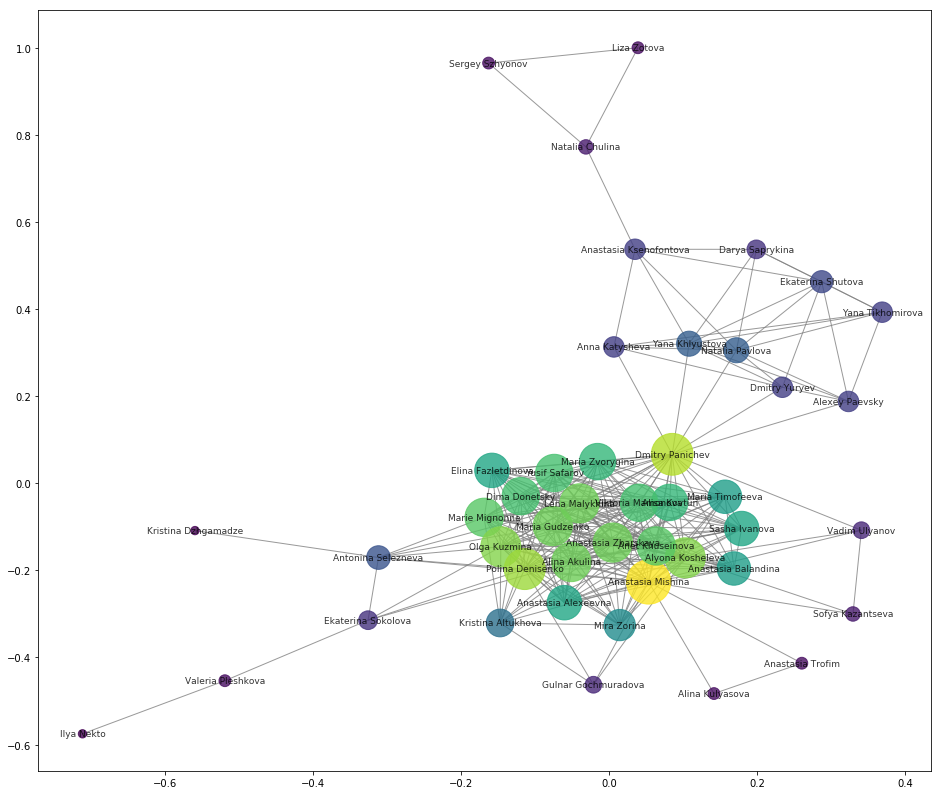

In [442]:
comp0={k:v for k,v in my_friends.items() if k in con_comps[0]}
g0 = nx.subgraph(g, comp0)

k0 = dict(nx.degree(g0))

plt.figure(1, figsize=(16,14))
coord = nx.kamada_kawai_layout(g0)
# coord = nx.spring_layout(g0)
nx.draw_networkx(g0,
                 pos=coord,
                 nodelist=list(k0.keys()),
                 node_size = [d*70 for d in k0.values()],
                 node_color=list(k0.values()),
                 edge_color='gray',
                 font_size=9,
#                  cmap=plt.cm.Reds,
                 with_labels=True,
                 alpha=0.8,
                 labels={k:v['name'] for k,v in comp0.items()},
                 )

In [371]:
print(f'''Number of nodes: {g0.number_of_nodes()}
Number of edges: {g0.number_of_edges()}
Clustering coefficient: {nx.average_clustering(g0):.2f}
Radius: {nx.radius(g0)}
Diameter: {nx.diameter(g0)}''')

Number of nodes: 45
Number of edges: 279
Clustering coefficient: 0.74
Radius: 4
Diameter: 8


Who is the most popular and important for this subgraph?

In [387]:
print('People with the highest degree:', '\n')
for i in sorted(g0.degree(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]}')

print('\n'+'People with the highest closeness centrality:', '\n')
for i in sorted(dict(nx.closeness_centrality(g0)).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.2f}')

print('\n'+'People with the highest betweennes centrality:', '\n')
for i in sorted(dict(nx.betweenness_centrality(g0).items()).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.2f}')

print('\n'+'People with the highest PageRank:', '\n')
for i in sorted(dict(nx.pagerank(g0)).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.4f}')

People with the highest degree: 

Anastasia Mishina (5138249): 28
Dmitry Panichev (6574872): 25
Polina Denisenko (93488973): 24

People with the highest closeness centrality: 

Dmitry Panichev (6574872): 0.61
Anastasia Mishina (5138249): 0.59
Polina Denisenko (93488973): 0.57

People with the highest betweennes centrality: 

Dmitry Panichev (6574872): 0.41
Anastasia Mishina (5138249): 0.15
Anastasia Ksenofontova (31460907): 0.13

People with the highest PageRank: 

Anastasia Mishina (5138249): 0.0452
Dmitry Panichev (6574872): 0.0407
Polina Denisenko (93488973): 0.0354


Three friends with the highest degree are my former groupmates who have lots of friends among people we studied with (where the network is dense). They have the highest closeness centrality and the highest PageRank, too

Among the leaders in betweennes centrality we can see an absolute winner, Dmitry. He connects the group of my friends in the MSU and my former colleagues. Without him, these two groups would be connected only by me

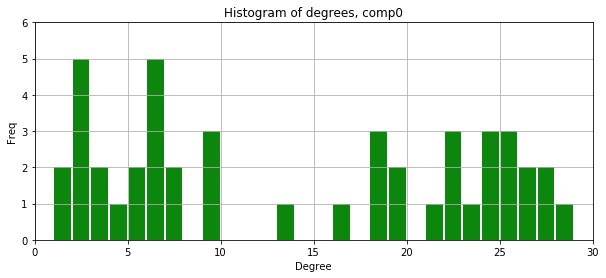

In [374]:
x0=[len(comp0[i]['friends']) for i in comp0]
plt.figure(1, figsize=(10,4))
n, bins, patches = plt.hist(x0, facecolor='g', alpha=0.95, rwidth=0.9, bins=max(x0)-1)
plt.xlabel('Degree')
plt.ylabel('Freq')
plt.title('Histogram of degrees, comp0')
plt.axis([0, 30, 0, 6])
plt.grid(True)
plt.show()

(I guess, the sample is too small to follow the power law)

We can also look at the densiest part of this component (core-8), and this is a group from the MSU

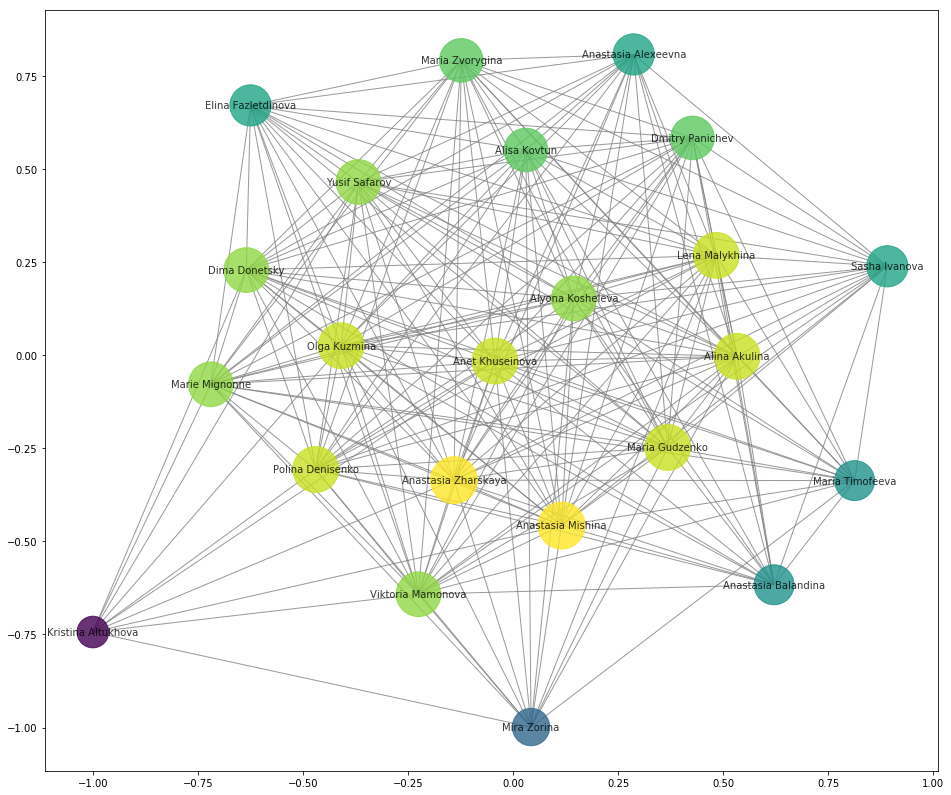

In [399]:
g0_8_core=nx.k_core(g0, k=8)

k0_8_core = dict(nx.degree(g0_8_core))
k0_8_core

plt.figure(1, figsize=(16,14))
coord = nx.kamada_kawai_layout(g0_8_core)
# coord = nx.spring_layout(g0_core)
nx.draw_networkx(g0_8_core,
                 pos=coord,
                 edge_color='gray', 
                 nodelist=list(k0_8_core.keys()),
                 node_size = [d*100 for d in k0_8_core.values()],
                 node_color=list(k0_8_core.values()),
                 font_size=10,
#                  cmap=plt.cm.Reds,
                 with_labels=True,
                 alpha=0.8,
                 labels={k:v['name'] for k,v in comp0_core.items()},
                 )

### The second subgraph

The second component is much smaller and not so dense. All these people lived in my hometown when I knew them

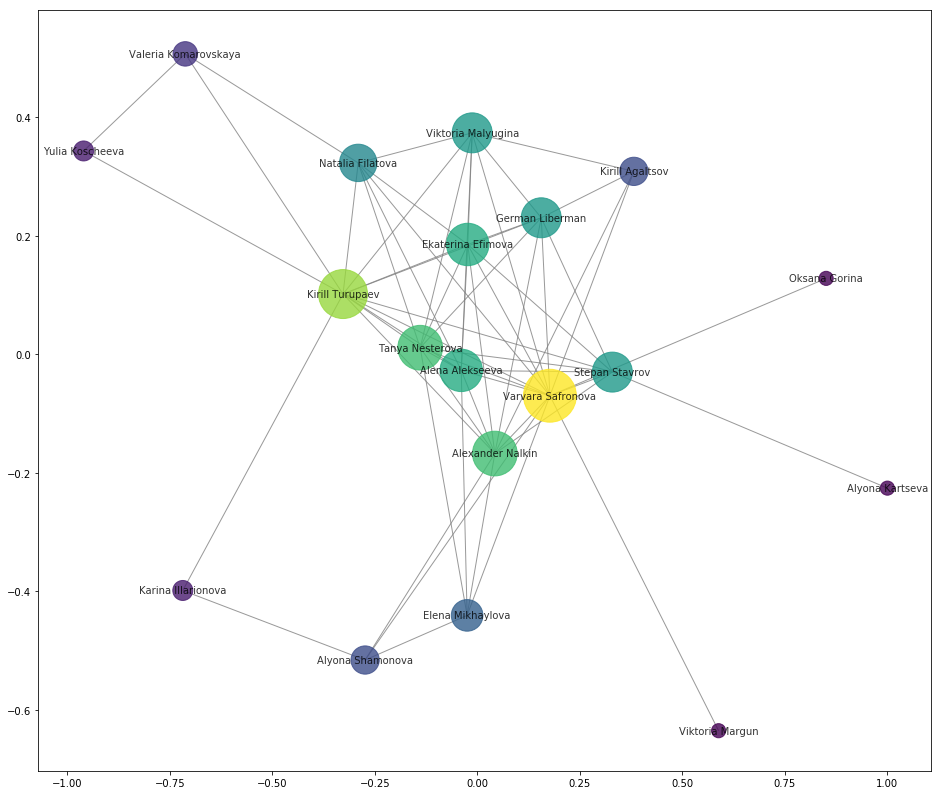

In [398]:
comp1={k:v for k,v in my_friends.items() if k in con_comps[1]}
g1 = nx.subgraph(g, comp1)

k1 = dict(nx.degree(g1))

plt.figure(1, figsize=(16,14))
# coord = nx.kamada_kawai_layout(g1)
coord = nx.spring_layout(g1)
nx.draw_networkx(g1,
                 pos=coord,
                 nodelist=list(k1.keys()),
                 node_size = [d*200 for d in k1.values()],
                 node_color=list(k1.values()),
                 edge_color='gray',
                 font_size=10,
#                  cmap=plt.cm.Reds,
                 with_labels=True,
                 alpha=0.8,
                 labels={k:v['name'] for k,v in comp1.items()},
                 )

In [390]:
print('People with the highest degree:', '\n')
for i in sorted(g1.degree(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]}')

print('\n'+'People with the highest closeness centrality:', '\n')
for i in sorted(dict(nx.closeness_centrality(g1)).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.2f}')

print('\n'+'People with the highest betweennes centrality:', '\n')
for i in sorted(dict(nx.betweenness_centrality(g1).items()).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.2f}')
          
print('\n'+'People with the highest PageRank:', '\n')
for i in sorted(dict(nx.pagerank(g1)).items(), key=itemgetter(1), reverse=True)[:3]:
    print(f'{my_friends[i[0]]["name"]} ({i[0]}): {i[1]:.4f}')

People with the highest degree: 

Varvara Safronova (110961900): 14
Kirill Turupaev (25621651): 12
Alexander Nalkin (20228527): 10

People with the highest closeness centrality: 

Varvara Safronova (110961900): 0.82
Kirill Turupaev (25621651): 0.75
Alexander Nalkin (20228527): 0.69

People with the highest betweennes centrality: 

Varvara Safronova (110961900): 0.31
Kirill Turupaev (25621651): 0.25
Stepan Stavrov (15401786): 0.11

People with the highest PageRank: 

Varvara Safronova (110961900): 0.1171
Kirill Turupaev (25621651): 0.0978
Alexander Nalkin (20228527): 0.0784


It's not so interesting to look at the results. I can guess, there could be other people is the leaderboard if they haven't revised their friend list deleting everybody they lost contact with. The graph is quite simple (comparing with the first component) and leaders in the closeness centrality as well as in the PageRank are the people who have the largest number of friends (i.e. degree)

Almost all of the nodes are my classmates except two women (Yulia and Valeria), they organise "Chto? Gde? Kogda?" and thus are linked only to one another and to my friends who were in my team (others were not interested in this)

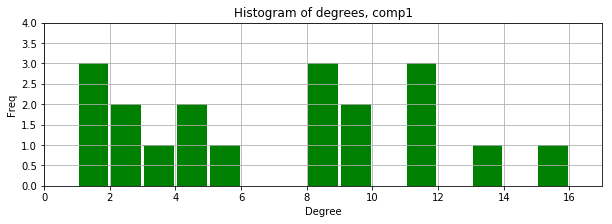

In [443]:
x1=[len(comp1[i]['friends']) for i in comp1]
plt.figure(1, figsize=(10,3))
n, bins, patches = plt.hist(x1, facecolor='g', rwidth=0.9, bins=max(x1)-1)
plt.xlabel('Degree')
plt.ylabel('Freq')
plt.title('Histogram of degrees, comp1')
plt.axis([0, 17, 0, 4])
plt.grid(True)
plt.show()

(Yes, this sample is even smaller, it doesn't look like the power law at all)

## In search of communities

In [452]:
cliques=sorted(dict(nx.node_clique_number(g)).items(), key=itemgetter(1), reverse=True)
cliques
for i in cliques:
    if i[1]>4:
        print(my_friends[i[0]]["name"], i[1])

Anastasia Mishina 15
Dmitry Panichev 15
Marie Mignonne 15
Maria Gudzenko 15
Olga Kuzmina 15
Lena Malykhina 15
Polina Denisenko 15
Maria Zvorygina 15
Yusif Safarov 15
Elina Fazletdinova 15
Alisa Kovtun 15
Dima Donetsky 15
Alyona Kosheleva 15
Anastasia Zharskaya 15
Anastasia Alexeevna 15
Viktoria Mamonova 15
Alina Akulina 15
Anet Khuseinova 15
Maria Timofeeva 13
Sasha Ivanova 13
Anastasia Balandina 12
Mira Zorina 11
Kristina Altukhova 10
Antonina Selezneva 7
Natalia Filatova 7
Kirill Turupaev 7
Alexander Nalkin 7
Varvara Safronova 7
Stepan Stavrov 7
Alena Alekseeva 7
Ekaterina Efimova 7
Tanya Nesterova 7
German Liberman 7
Viktoria Malyugina 7
Alexey Paevsky 5
Yana Tikhomirova 5
Dmitry Yuryev 5
Ekaterina Shutova 5
Natalia Pavlova 5
Yana Khlyustova 5
Anna Katysheva 5
Darya Saprykina 5
Anastasia Ksenofontova 5
Elena Mikhaylova 5


I can see that several largest cliques (of 15, 13, 12, 11, 10) consist of my friends from the MSU, the clique of 7 includes my classmates, clique of 5 - my former colleagues